<a href="https://colab.research.google.com/github/AlyssaAmod/UNN_BraTS23/blob/main/Augmentations_Efficient_AAupdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install synapseclient

# Validation segmentations

In [1]:
import synapseclient
import zipfile
import os
import random
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torch
# !pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

In [6]:
syn = synapseclient.Synapse()
syn.login(email='pearlyjoubert2@gmail.com', password='SPARK_BRATS_2023')
val = syn.get("syn52045895")

VAL_path = val.path

specific_string = "BraTS-"

[WARNING] Logging into Synapse via passwords will be deprecated by early 2024. This message will disappear if you use a Synapse Personal Access Token to login.


Welcome, pearlyjoubert2@gmail.com!



INFO:synapseclient_default:Welcome, pearlyjoubert2@gmail.com!



In [9]:
VAL_dir = "/content/sample_data/VAL_"
if not os.path.exists(VAL_dir):
    os.mkdir(VAL_dir)

with zipfile.ZipFile(VAL_path, 'r') as zip_ref:
    zip_ref.extractall(VAL_dir)

In [10]:
# Model: train_all
train_all = syn.get("syn52257546")
train_all_path = train_all.path
train_all_dir = "/content/sample_data/train_all"
if not os.path.exists(train_all_dir):
    os.mkdir(train_all_dir)
with zipfile.ZipFile(train_all_path, 'r') as zip_ref:
    zip_ref.extractall(train_all_dir)

In [12]:
# Model: train_gli
train_GLI = syn.get("syn52266215")
train_GLI_path = train_GLI.path
train_GLI_dir = "/content/sample_data/train_GLI"
if not os.path.exists(train_GLI_dir):
    os.mkdir(train_GLI_dir)
with zipfile.ZipFile(train_GLI_path, 'r') as zip_ref:
    zip_ref.extractall(train_GLI_dir)

In [11]:
# Model: GLIftSSA
GLIftSSA = syn.get("syn52258716")
GLIftSSA_path = GLIftSSA.path
GLIftSSA_dir = "/content/sample_data/GLIftSSA"
if not os.path.exists(GLIftSSA_dir):
    os.mkdir(GLIftSSA_dir)
with zipfile.ZipFile(GLIftSSA_path, 'r') as zip_ref:
    zip_ref.extractall(GLIftSSA_dir)

In [13]:
# Model: train_SSA
SSA1 = syn.get("syn52234037")
SSA2 = syn.get("syn52272792")
SSA1_path = SSA1.path
SSA2_path = SSA2.path
train_SSA_dir = "/content/sample_data/train_SSA"
if not os.path.exists(train_SSA_dir):
    os.mkdir(train_SSA_dir)
with zipfile.ZipFile(SSA1_path, 'r') as zip_ref:
    zip_ref.extractall(train_SSA_dir)
with zipfile.ZipFile(SSA2_path, 'r') as zip_ref:
    zip_ref.extractall(train_SSA_dir)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import random
from matplotlib.colors import ListedColormap
import torch
import json
from glob import glob
import time
import random
import numpy as np
from matplotlib import rcParams
import torchio as tio

['D:\\CourseStuff\\SPARK\\BraTS2023\\results\\train_ssa\\ssa_all\\predictions\\final_preds4Folds', 'D:\\CourseStuff\\SPARK\\BraTS2023\\results\\train_all\\final_preds', 'D:\\CourseStuff\\SPARK\\BraTS2023\\results\\train_gli\\gli\\final_preds_ssa', 'D:\\CourseStuff\\SPARK\\BraTS2023\\results\\train_gli\\final_preds4Folds']
(240, 240, 155) (240, 240, 155)
(240, 240, 155) (240, 240, 155)
(240, 240, 155) (240, 240, 155)
(240, 240, 155) (240, 240, 155)


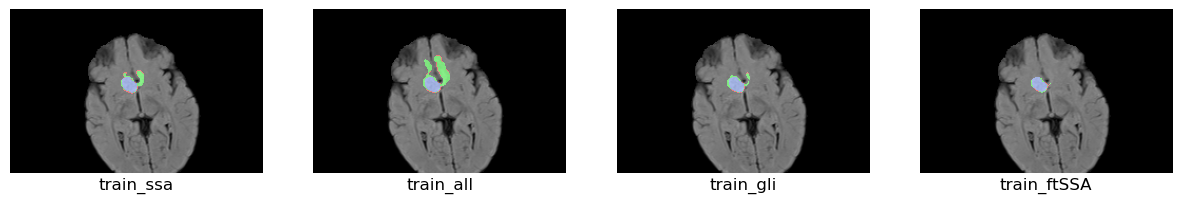

: 

In [101]:
def flip(x):
    return np.rot90(x)

to_ras = tio.ToCanonical()

# VAL_data_dir = '/content/sample_data/VAL_/ASNR-MICCAI-BraTS2023-SSA-Challenge-ValidationData'
VAL_data_dir = 'D:\\CourseStuff\\SPARK\BraTS2023\\Data\\SSA-Val'
# seg_data_dir = '/content/sample_data/train_GLI'
# seg_data_dir = '/content/sample_data/train_all'
outfile = "D:\\CourseStuff\\SPARK\BraTS2023\\results"
ftSSA = "D:\\CourseStuff\\SPARK\BraTS2023\\results\\train_gli\\final_preds4Folds"
gli = "D:\\CourseStuff\\SPARK\BraTS2023\\results\\train_gli\\gli\\final_preds_ssa"
ssa = "D:\\CourseStuff\\SPARK\BraTS2023\\results\\train_ssa\\ssa_all\\predictions\\final_preds4Folds"
all = "D:\\CourseStuff\\SPARK\BraTS2023\\results\\train_all\\final_preds"

axis_name = ["train_ssa", "train_all", "train_gli", "train_ftSSA"]
seg_data_dir = [ssa, all, gli, ftSSA]
print(seg_data_dir)
subject_id = 'BraTS-SSA-00129-000'
imgs = []
lbls = []
# Extract slice for visualisation purposes
slice_num_a=76
slice_num_c=76
slice_num_s=108
for pth in range(len(seg_data_dir)):
    # Load image volumes
    img_volumes = [nib.load(os.path.join(os.path.join(VAL_data_dir, subject_id), subject_id + f"-{m}.nii.gz")) for m in ["t1n", "t1c", "t2w", "t2f"]]
    img_volumes = [to_ras(img_volumes[i]) for i in range(len(img_volumes))]
    # Load segmentation volume
    seg_volume = nib.load(os.path.join(f"{seg_data_dir[pth]}", subject_id + ".nii.gz"))

    # Extract Axial  slice
    imgs1 = [img_volumes[i].get_fdata().astype(np.float32) for i in range(len(img_volumes))]
    lbl1 = seg_volume.get_fdata().astype(np.float32)
    print(imgs1[3].shape, lbl1.shape)
    imgs.append(imgs1[3][:, slice_num_a, :])
    lbls.append(lbl1[:, slice_num_a, :])


colours = ['black', 'red', 'lime', 'royalblue']
cmap = ListedColormap(colours)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
for x, ax in enumerate(axs.ravel()):
    image = imgs[x]
    label = lbls[x]
    ax.imshow(flip(image), cmap="gray")
    ax.imshow(flip(label), cmap=cmap, alpha=0.4)
    ax.set_title(axis_name[x], y=-0.15); ax.axis('off')
    # ax[1].imshow(flip(imgs2[1]), cmap="gray")
    # ax[1].imshow(flip(lbl2), cmap=cmap, alpha=0.4)
    # ax[1].axis('off')
    # ax[2].imshow(flip(imgs3[1]), cmap="gray")
    # ax[2].imshow(flip(lbl3), cmap=cmap, alpha=0.4)
    # ax[2].axis('off')
    # ax[0].set_aspect('equal')
# plt.suptitle("Subject 3")
# plt.tight_layout()
# plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(outfile, f'{subject_id}_axial.eps'), bbox_inches='tight')
plt.show()


# Transforms stuff (previously)

In [ ]:
import synapseclient
syn = synapseclient.Synapse()
syn.login(email='pearlyjoubert2@gmail.com', password='SPARK_BRATS_2023')
SSA = syn.get("syn51692615")
GLI = syn.get("syn51514132")
# creating file path
SSA_path = SSA.path
GLI_path = GLI.path


specific_string = "BraTS-"

[WARNING] Logging into Synapse via passwords will be deprecated by early 2024. This message will disappear if you use a Synapse Personal Access Token to login.


Welcome, pearlyjoubert2@gmail.com!



INFO:synapseclient_default:Welcome, pearlyjoubert2@gmail.com!



In [ ]:
import zipfile
import os
import random
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio

from torchio.transforms import RandomFlip
path_to_SSA = SSA_path
path_to_GLI = GLI_path
SSA_dir = "/content/sample_data/SSA_data"
if not os.path.exists(SSA_dir):
    os.mkdir(SSA_dir)
GLI_dir = "/content/sample_data/GLI_data"
if not os.path.exists(GLI_dir):
    os.mkdir(GLI_dir)

with zipfile.ZipFile(path_to_SSA, 'r') as zip_ref:
    zip_ref.extractall(SSA_dir)

with zipfile.ZipFile(path_to_GLI, 'r') as zip_ref:
    zip_ref.extractall(GLI_dir)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
final_GLI_dir = os.path.join(GLI_dir, 'ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData')
print(len(os.listdir(final_GLI_dir)))

1251


Randomly selected file: BraTS-GLI-01261-000


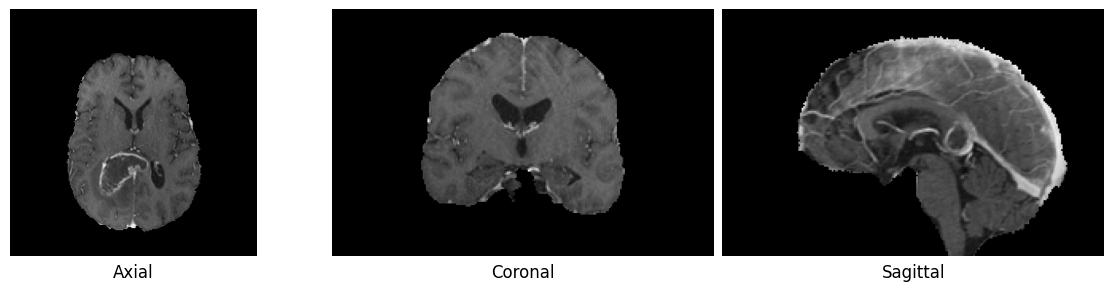

In [ ]:
# Alex code
# Creating visual for report

import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import random
from matplotlib.colors import ListedColormap
import torch
import json
from glob import glob
import time
import random
import numpy as np
from matplotlib import rcParams
import torchio as tio

def flip(x):
    return np.rot90(x)

data_dir = final_GLI_dir
files = os.listdir(data_dir)
# Choose a random file
subject_id = random.choice(files)
print("Randomly selected file:", subject_id)
# subject_id = 'BraTS-SSA-00007-000'

# Load image volumes
img_volumes = [nib.load(os.path.join(os.path.join(data_dir, subject_id), subject_id + f"-{m}.nii.gz")) for m in ["t1n", "t1c", "t2w", "t2f"]]
# Load segmentation volume
seg_volume = nib.load(os.path.join(os.path.join(data_dir, subject_id), subject_id + "-seg.nii.gz"))

# Extract slice for visualisation purposes
# Extract Axial  slice
imgs1 = [img_volumes[i].get_fdata().astype(np.float32)[:, :, 75] for i in range(len(img_volumes))]
lbl1 = seg_volume.get_fdata().astype(np.float32)[:, :, 75]
# Extract Coronal slice
imgs2 = [img_volumes[i].get_fdata().astype(np.float32)[:, 120, :] for i in range(len(img_volumes))]
lbl2 = seg_volume.get_fdata().astype(np.float32)[:, 120, :]
# Extract Sagittal slice
imgs3 = [img_volumes[i].get_fdata().astype(np.float32)[120, :, :] for i in range(len(img_volumes))]
lbl3 = seg_volume.get_fdata().astype(np.float32)[120, :, :]
# Create colour map to plot
colours = ['black', 'red', 'lime', 'royalblue']
cmap = ListedColormap(colours)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
ax[0].imshow(flip(flip(flip(imgs1[1]))), cmap="gray")
ax[0].set_title('Axial', y=-0.12); ax[0].axis('off')
ax[1].imshow(flip(imgs2[1]), cmap="gray")
ax[1].set_title('Coronal', y=-0.12); ax[1].axis('off')
ax[2].imshow(flip(imgs3[1]), cmap="gray")
ax[2].set_title('Sagittal', y=-0.12); ax[2].axis('off')
ax[0].set_aspect('equal')
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()


In [ ]:
def transforms():
    #Cropping patch
    patch = tio.CropOrPad(target_shape=128, mask_name='labels',labels=[1,2,3], padding_mode='edge')

    #Random flips along a single axes
    flipR = tio.Compose([
        tio.RandomFlip(axes=0, p=0.3),
        tio.RandomFlip(axes=1, p=0.3),
        tio.RandomFlip(axes=2, p=0.3)])

    #fakeSSA resample approaches
    resampleR = tio.Compose([
                tio.Resample((1.2, 1.2, 6), scalars_only=True),
                tio.Resample(1)])

    anisoR = tio.Compose([
                tio.RandomAnisotropy(axes=(1, 2), downsampling=(1.2), scalars_only=True),
                tio.RandomAnisotropy(axes=0, downsampling=(6), scalars_only=True)])

    #Simulating scanner artefacts
    blurR = tio.RandomBlur(std=(0.5, 1.5))
    noiseR = tio.RandomNoise(mean=0, std=(0, 0.33))
    motionR = tio.RandomMotion(num_transforms=3, image_interpolation='nearest')
    biasfR = tio.RandomBiasField(coefficients=1)
    ghostR = tio.RandomGhosting(intensity=1.5)

    #full training implementations
    train = tio.Compose([
        tio.CropOrPad(target_shape=128, mask_name='labels',labels=[1,2,3], padding_mode='edge'),
        tio.OneOf([
            tio.Compose([
                tio.RandomFlip(axes=0, p=0.3),
                tio.RandomFlip(axes=1, p=0.3),
                tio.RandomFlip(axes=2, p=0.3)]),
            tio.RandomAffine(degrees=15,p=0.3)
        ], p=0.8),
        tio.EnsureShapeMultiple(2**7, method='pad')])

    fakeSSA_resamp = tio.Compose([
        tio.CropOrPad(target_shape=128, mask_name='labels',labels=[1,2,3], padding_mode='edge'),
        tio.OneOf([
            tio.Compose([
                tio.RandomFlip(axes=0, p=0.3),
                tio.RandomFlip(axes=1, p=0.3),
                tio.RandomFlip(axes=2, p=0.3)]),
            tio.RandomAffine(degrees=15,p=0.3)
        ], p=0.8),
        tio.EnsureShapeMultiple(2**7, method='pad'),
        tio.OneOf({
            tio.Compose([
                tio.Resample((1.2, 1.2, 6), scalars_only=True),
                tio.Resample(1)
            ]):0.50,
            tio.Compose([
                tio.RandomAnisotropy(axes=(1, 2), downsampling=(1.2), scalars_only=True),
                tio.RandomAnisotropy(axes=0, downsampling=(6), scalars_only=True)
            ]):0.50,},p=0.50)
        ])

    fakeSSA_augs = tio.Compose([
        tio.CropOrPad(target_shape=128, mask_name='labels',labels=[1,2,3], padding_mode='edge'),
        tio.OneOf([
            tio.Compose([
                tio.RandomFlip(axes=0, p=0.3),
                tio.RandomFlip(axes=1, p=0.3),
                tio.RandomFlip(axes=2, p=0.3)]),
            tio.RandomAffine(degrees=15,p=0.3)
        ], p=0.8),
        tio.EnsureShapeMultiple(2**7, method='pad'),
        tio.Compose([
            tio.OneOf({
                tio.RandomBlur(std=(0.5, 1.5)) : 0.3,
                tio.RandomNoise(mean=3, std=(0, 0.33)) : 0.7
            },p=0.50),
            tio.OneOf({
                tio.RandomMotion(num_transforms=3, image_interpolation='nearest') : 0.5,
                tio.RandomBiasField(coefficients=1) : 0.2,
                tio.RandomGhosting(intensity=1.5) : 0.3
            }, p=0.50)])
        ])
    # creating a dictionary for the different augmentations
    Augs = {1: flipR, 2: resampleR, 3: anisoR, 4: blurR, 5: noiseR, 6: motionR, 7: biasfR, 8: ghostR, 9: patch, 10: train, 11: fakeSSA_resamp, 12: fakeSSA_augs}

    return Augs


## AA adapting PJ code so uses torchio subject like data_class --> changed var names to make sure nothing clashes when running

In [ ]:
print(GLI_dir)
data_dir = os.path.join(GLI_dir, "ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData")
print(data_dir)

/content/sample_data/GLI_data
/content/sample_data/GLI_data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData


In [ ]:
def plot_augs(data_dir, aug_idx):
    # list of patients
    # patient_num = ["BraTS-GLI-01442-000", "BraTS-GLI-00090-000", "BraTS-GLI-00445-000", "BraTS-GLI-00642-000", "BraTS-GLI-00828-000"]
    SSA_data = "/content/sample_data/augments"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    subject_dirs = sorted([os.path.join(data_dir, subject_dir) for subject_dir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subject_dir)) and subject_dir.startswith(specific_string)])

    print("Total folders: ", len(subject_dirs))
    subj_folder = subject_dirs[random.randrange(0, len(subject_dirs))]
    print(f"Working with subject: {subj_folder}")

    # Iterate through the subject folders
    subject_id = os.path.basename(subj_folder)
    # Create a list to hold the subject's images and labels
    images = []
    labels = []
    img_paths = []
    img_modality = []
    # Load each scan modality and segmentation
    for modality in ['t1n', 't1c', 't2w', 't2f']:
        image_path = os.path.join(subj_folder, f'{subject_id}-{modality}.nii.gz')
        img_paths.append(image_path)
        image = tio.ScalarImage(image_path)
        images.append(image)

    loaded_modalities = [nib.load(path) for path in img_paths]
    t1n, t1c, t2w, t2f = loaded_modalities
    img_modality.extend([t1n, t1c, t2w, t2f])
    affine, header = t2f.affine, t2f.header
    imgs = np.stack([modality.get_fdata().astype(np.float16) for modality in loaded_modalities], axis=-1)
    imgs = nib.nifti1.Nifti1Image(imgs, affine, header=header)

    label_path = os.path.join(subj_folder, f'{subject_id}-seg.nii.gz')
    label = tio.LabelMap(label_path)
    labels.append(label)

    # Create the subject using the images and labels
    subject = tio.Subject(
        stk=images[0],
        t1c=images[1],
        t2f=images[2],
        seg=labels[0],
        name=subject_id
        )

    ## keep track of images without Augmentations
    dat_stk = subject["stk"].data
    dat_t1c = subject["t1c"].data
    dat_t2f = subject["t2f"].data
    dat_seg = subject["seg"].data

    image_before_ax = dat_stk.squeeze(0)[ :, :, 75]
    image_before_cor = dat_stk.squeeze(0)[:, 120, :]
    image_before_sag = dat_stk.squeeze(0)[120, :, :]
    image_before = [image_before_ax, image_before_cor,image_before_sag]
    for i in range(len(image_before)):
        plt.imshow(image_before[i], cmap='gray')
        plt.axis('off')
        plt.savefig(os.path.join(SSA_data, f'{subject_id}-{i}.png'))

        # different augmentations now defined in previous cell
    Augs = transforms()

    transform = Augs[aug_idx] # choose the axis to flip (x,y,z) used p=0.3 initially
    transformed_subject = transform(subject)
    image = transformed_subject["stk"].data.squeeze(0)
    contrast = transformed_subject["t1c"].data.squeeze(0)
    flair = transformed_subject["t2f"].data.squeeze(0)
    mask = transformed_subject["seg"].data.squeeze(0)
    print(f"transformed shapes squeezed {image.shape}, mask shape {mask.shape}, before was {dat_stk.shape}")

    plt.imshow(image[ :, :, 75], cmap='gray')
    plt.axis('off')
    plt.savefig(os.path.join(SSA_data, f'{subject_id}-{aug_idx}.png'))
    #plt.show()
    image_after_ax = image[ :, :, 75]
    image_after_cor = image[:, 120, :]
    image_after_sag = image[120, :, :]
    image_after = [image_after_ax, image_after_cor,image_after_sag]

    list_paths = ["/content/sample_data/RandomFlip_GLI/",
                    "/content/sample_data/Resample_GLI/",
                    "/content/sample_data/AnisoR_GLI/",
                    "/content/sample_data/BlurR_GLI/",
                    "/content/sample_data/NoiseR_GLI/",
                    "/content/sample_data/MotionR_GLI/",
                    "/content/sample_data/BiasFieldR_GLI/",
                    "/content/sample_data/patch_GLI/",
                    "/content/sample_data/train_GLI/",
                    "/content/sample_data/fakeSSA_resamp/",
                    "/content/sample_data/fakeSSA_augs/"]
    # remember to change the index depending on the Aug you choose
    subplot_path = list_paths[aug_idx - 1]
    if not os.path.exists(subplot_path):
        os.mkdir(subplot_path)
        #label_mod = ["t2w", "t2f"]

    # Display the images WITH Augmentations
    fig, ax = plt.subplots(1,3)
    fig.set_figwidth(15)
    ax[0].imshow(image_after[0], cmap = "gray")
    ax[1].imshow(image_after[1], cmap = "gray")
    ax[2].imshow(image_after[2], cmap = "gray")
    ax[0].set_title("ax")
    ax[1].set_title("cor")
    ax[2].set_title("sag")
    plt.suptitle("With Augmentation")
    plt.savefig(os.path.join(subplot_path, f'GLI-{subject_id}.png'), bbox_inches='tight')
    plt.show()

    # Display the imageS WITHOUT Augmentations
    fig, ax = plt.subplots(1,3)
    fig.set_figwidth(15)
    ax[0].imshow(image_before[0], cmap = "gray")
    ax[1].imshow(image_before[1], cmap = "gray")
    ax[2].imshow(image_before[2], cmap = "gray")
    ax[0].set_title("ax")
    ax[1].set_title("cor")
    ax[2].set_title("sag")
    plt.suptitle("No Augmentation")
    plt.savefig(os.path.join(subplot_path, f'GLI-{subject_id}.png'), bbox_inches='tight')
    plt.show()


Total folders:  1251
Working with subject: /content/sample_data/GLI_data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-01157-000
transformed shapes squeezed torch.Size([128, 128, 128]), mask shape torch.Size([128, 128, 128]), before was torch.Size([1, 240, 240, 155])


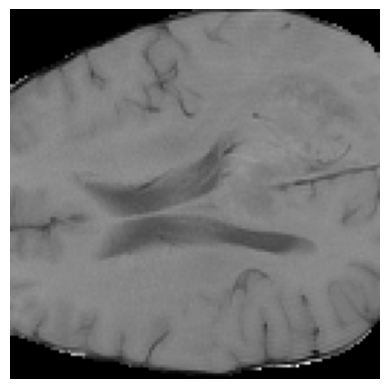

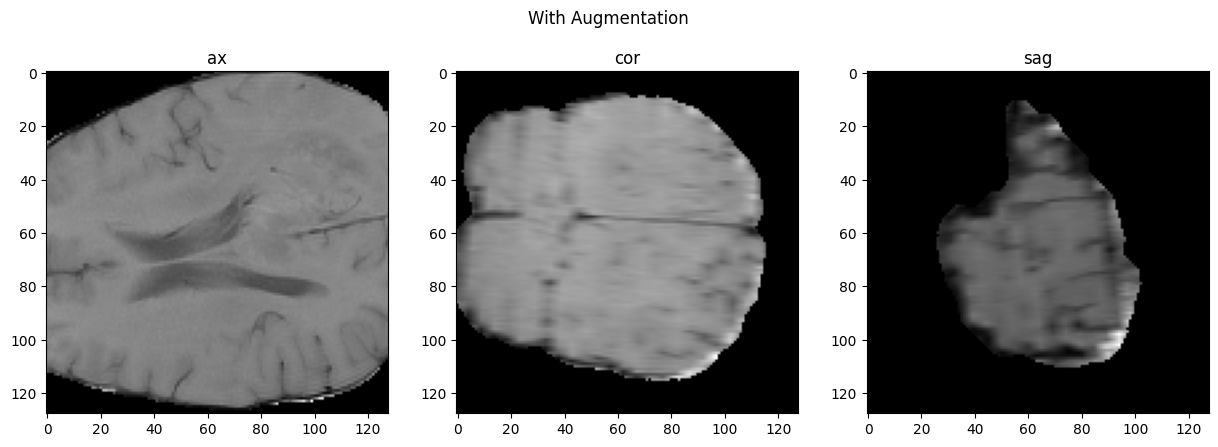

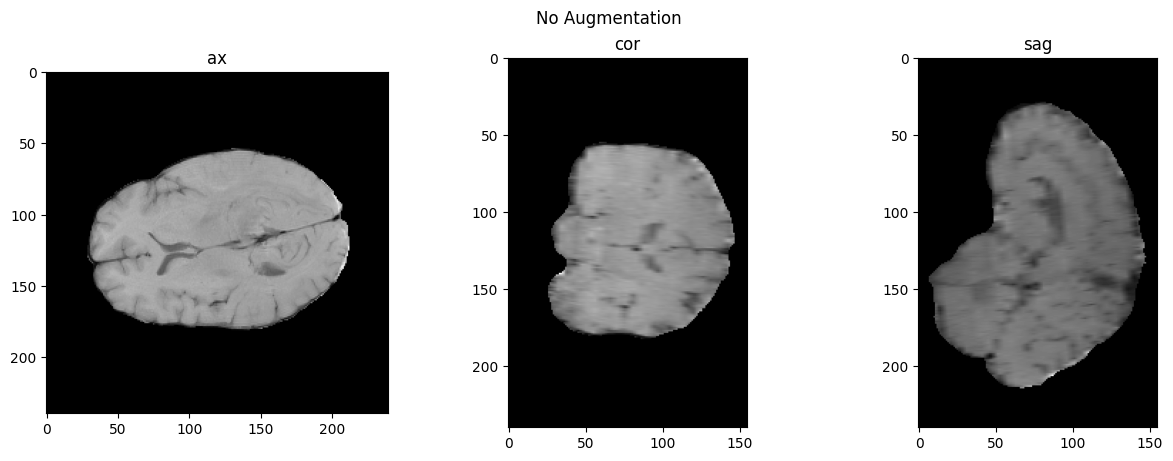

Total folders:  1251
Working with subject: /content/sample_data/GLI_data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-01264-000
transformed shapes squeezed torch.Size([240, 240, 156]), mask shape torch.Size([240, 240, 155]), before was torch.Size([1, 240, 240, 155])


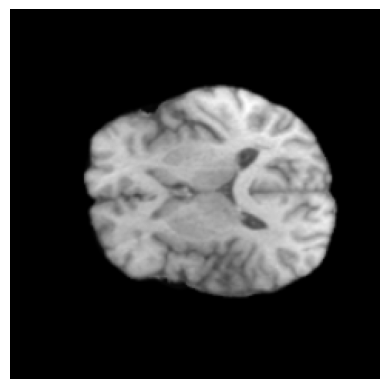

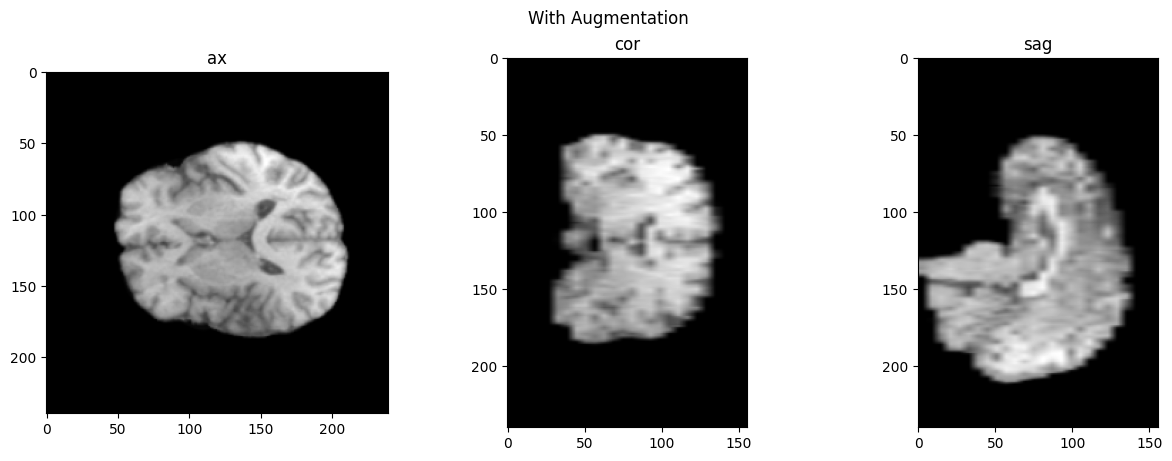

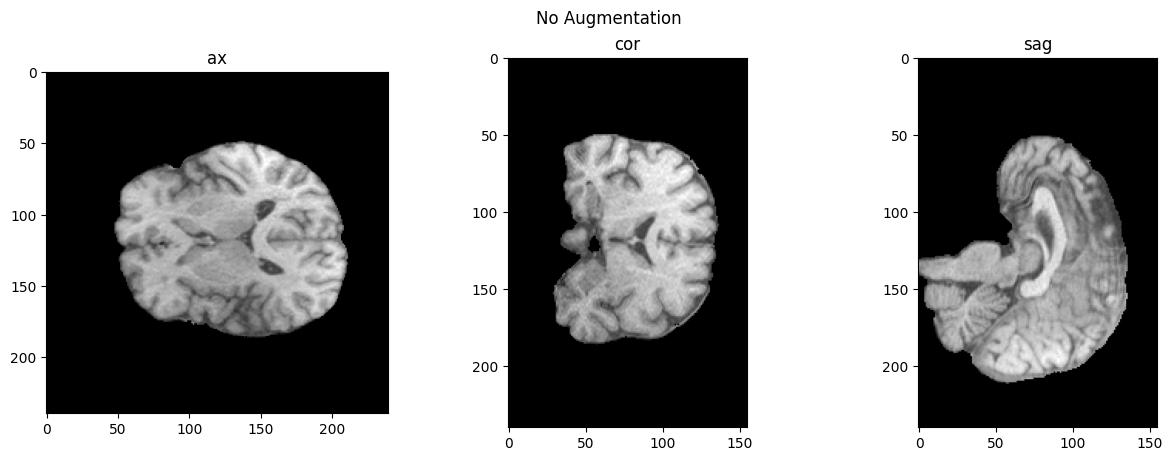

In [ ]:
# choose augmentation
#1: flipR
#2: resampleR
#3: anisoR
#4: blurR
#5: noiseR
#6: motionR
#7: biasfR
#8: ghostR
# 9: patch
# 10: train
# 11: fakeSSA_resamp
# 12: fakeSSA_augs
###############################################
# print_files (dir, Aug_index, Patient_index)
# NB !! Rememebr to change the Aug_index depending on the Aug you choose.
plot_augs(data_dir,10)
plot_augs(data_dir,11)
